# Project 11 - Credit card default propensity prediction
__Objective__ – Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.

## Project instructions
1.	Perform the required data pre-processing to treat for missing values and outliers
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Identify any multi-collinearity and perform dimensionality reduction like PCA if required
4.	Use the original X variables or the components from PCA & divide the given data into train and test sets
5.	Build a model to predict the default propensity of a customer
6.	Evaluate the model based on model performance measures for classification and recommend the most suitable model.
7.	Come up with recommendations / actionable insights based on feature importance scores derived from the model.


## About the dataset
The dataset contains the following information of 30000 customers:
1.	__DEFAULT__ - Default payment next month (Yes=1, No=0)
2.	__LIMIT_BAL__ - Amount of the given credit (INR)  
3.	__SEX__ - Gender (1 = male; 2 = female)
4.	__EDUCATION__ - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
5.	__MARRIAGE__ - (1 = married; 2 = single; 3 = others)
6.	__AGE__ - (year)
7.	__PAST_PAY__ - History of repayment status
    <br> -  PAST_PAY1 = the repayment status in September 2005
    <br> -  PAST_PAY2 = the repayment status in August 2005
    <br> -  PAST_PAY6 = the repayment status in April 2005
    <br> -  The measurement scale for the repayment status is 
         i.  -1 = pay duly <br>
        ii.	 1 = payment delay for one month<br>
        iii. 2 = payment delay for two months <br>
        iv.	 8 = payment delay for eight months<br>
        v.	 9 = payment delay for nine months and above <br>
8.	__BILL_AMT__- Amount of bill statement (INR)
    <br> -  BILL_AMT1 = amount of bill statement in September 2005
    <br> -  BILL_AMT2 = amount of bill statement in August 2005
    <br> -  BILL_AMT6 = amount of bill statement in April 2005
9.	__PAY_AMT__ - Amount of previous payment (INR)
    <br> -  PAY_AMT1 = amount paid in September 2005
    <br> -  PAY_AMT2 = amount paid in August 2005
    <br> -  PAY_AMT6 = amount paid in April 2005


# Additional information
1.	The difference between the bill amount and the past pay for a month will give an indication of the pending amount for each month and can be used as an additional X variable
2.	The average / sum of bill amount can be used as an additional X variable which will give an indication on the customer value.


In [1]:
#pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api   as sm
warnings.filterwarnings('ignore')

from sklearn.model_selection   import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model      import LogisticRegression
from sklearn.metrics           import classification_report
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier
from scipy.stats               import randint as sp_randint
from imblearn.over_sampling import SMOTE

df = pd.read_csv('credit_card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [5]:
print("There are {} missing records in the dataset.".format(df.isnull().sum().sum()))

There are 0 missing records in the dataset.


In [6]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       DEFAULT  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

# EDA

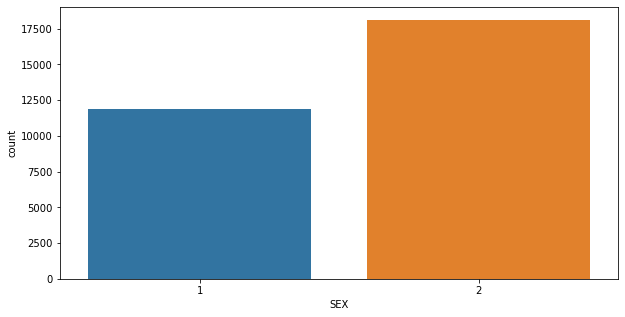

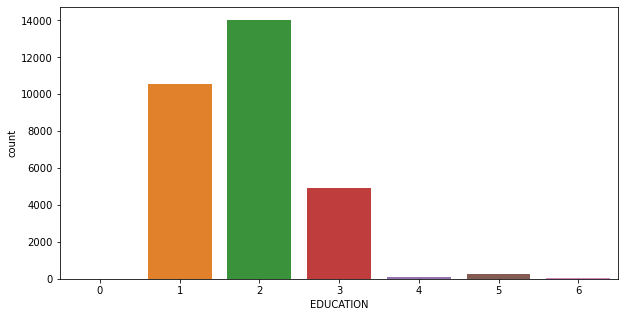

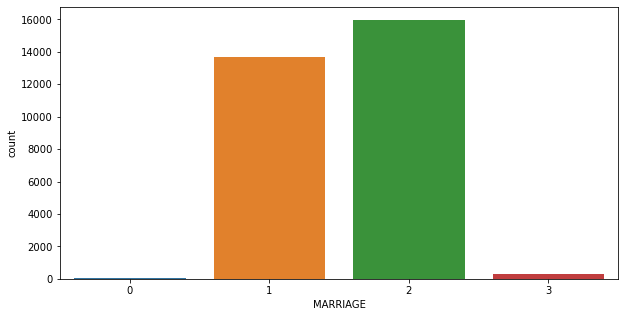

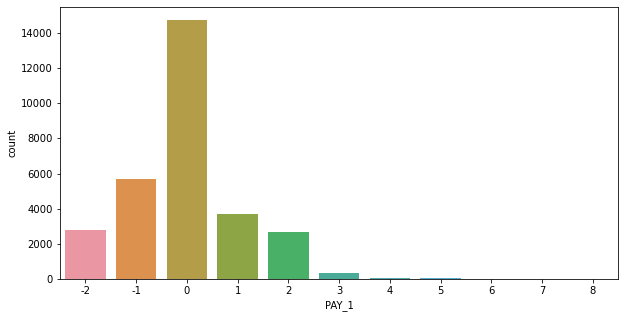

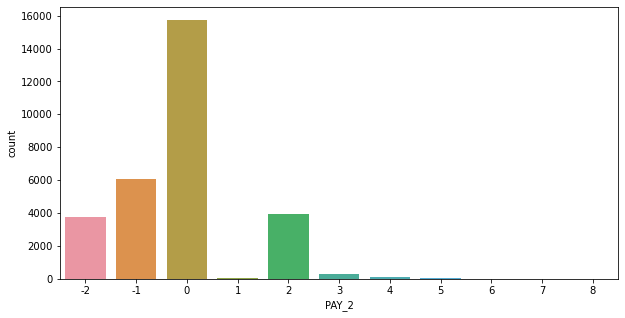

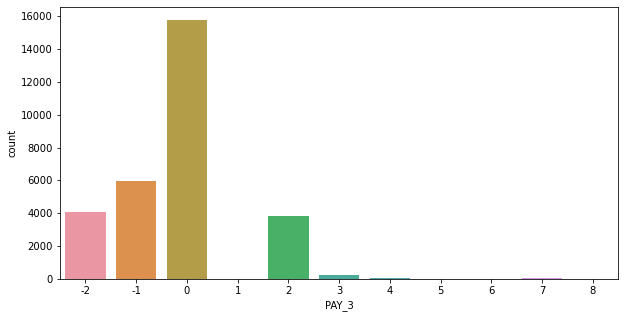

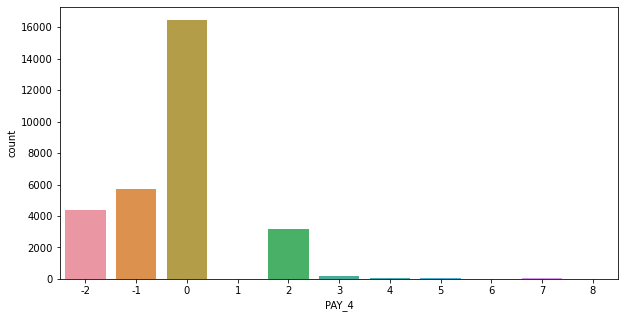

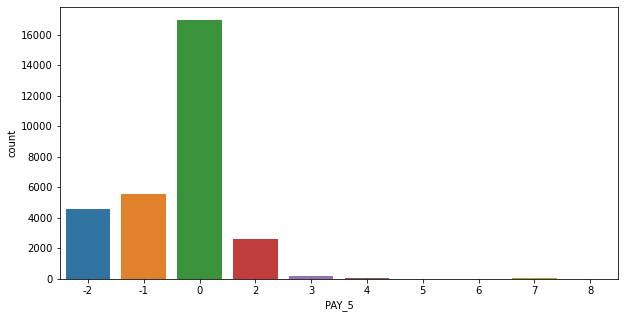

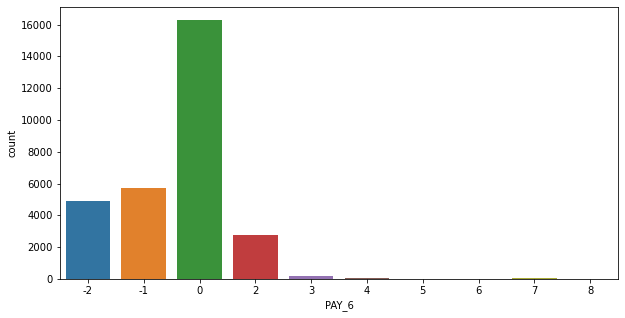

In [7]:
for i in [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

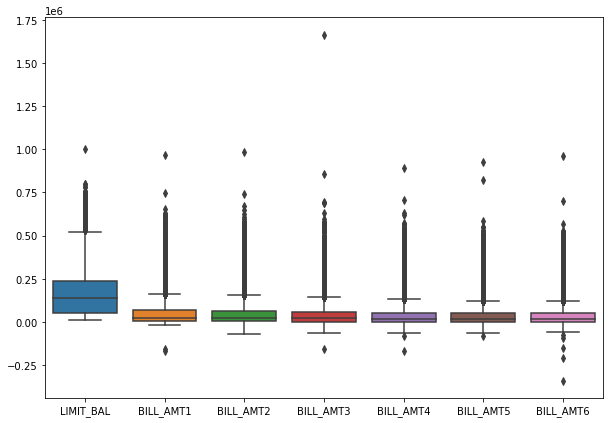

In [8]:
# Boxplot for Bill_Amt vs Limit_bal

plt.figure(figsize=(10,7))
sns.boxplot(data=df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.show()

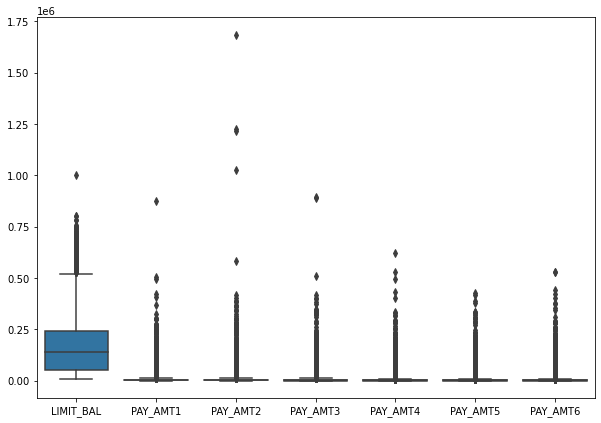

In [9]:
# Boxplot for Pay_Amt vs Limit_bal

plt.figure(figsize=(10,7))
sns.boxplot(data=df[['LIMIT_BAL','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.show()

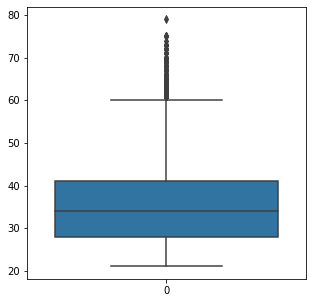

In [10]:
# Boxplot for column 'AGE'
plt.figure(figsize=(5,5))
sns.boxplot(data=df['AGE'])
plt.show()

In [11]:
# Outliers on numberical columns

num_var = df.select_dtypes(exclude='object')
for i in num_var:
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of ID =  14999.5
UL of ID =  44999.5
LL of ID =  -14998.5
Number of Outliers in ID  =  0
 
IQR of LIMIT_BAL =  190000.0
UL of LIMIT_BAL =  525000.0
LL of LIMIT_BAL =  -235000.0
Number of Outliers in LIMIT_BAL  =  167
 
IQR of SEX =  1.0
UL of SEX =  3.5
LL of SEX =  -0.5
Number of Outliers in SEX  =  0
 
IQR of EDUCATION =  1.0
UL of EDUCATION =  3.5
LL of EDUCATION =  -0.5
Number of Outliers in EDUCATION  =  454
 
IQR of MARRIAGE =  1.0
UL of MARRIAGE =  3.5
LL of MARRIAGE =  -0.5
Number of Outliers in MARRIAGE  =  0
 
IQR of AGE =  13.0
UL of AGE =  60.5
LL of AGE =  8.5
Number of Outliers in AGE  =  272
 
IQR of PAY_1 =  1.0
UL of PAY_1 =  1.5
LL of PAY_1 =  -2.5
Number of Outliers in PAY_1  =  3130
 
IQR of PAY_2 =  1.0
UL of PAY_2 =  1.5
LL of PAY_2 =  -2.5
Number of Outliers in PAY_2  =  4410
 
IQR of PAY_3 =  1.0
UL of PAY_3 =  1.5
LL of PAY_3 =  -2.5
Number of Outliers in PAY_3  =  4209
 
IQR of PAY_4 =  1.0
UL of PAY_4 =  1.5
LL of PAY_4 =  -2.5
Number of Outliers in PAY_4

## Distplot

In [12]:
mi0 = df[df['DEFAULT']==0]
mi1 = df[df['DEFAULT']==1]

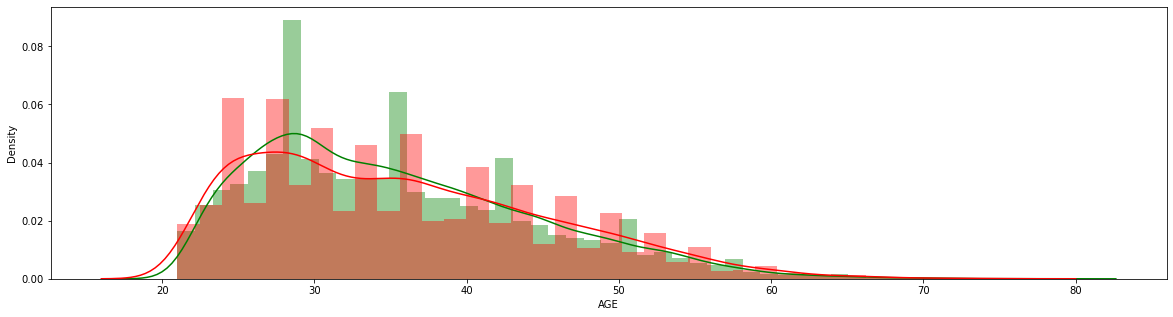

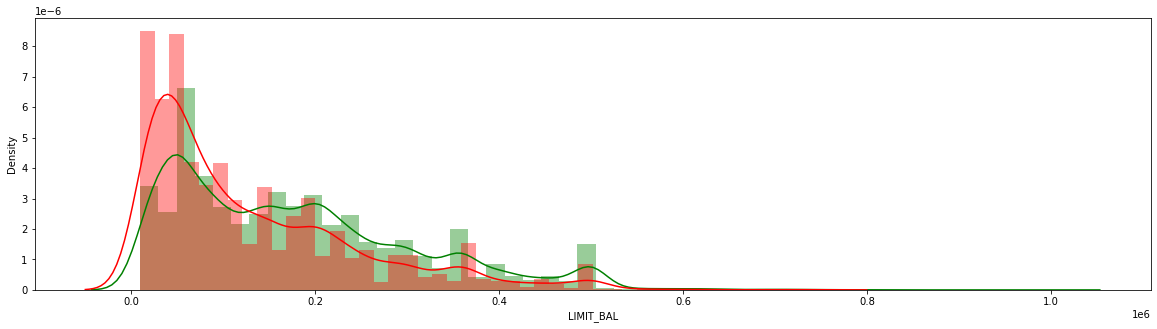

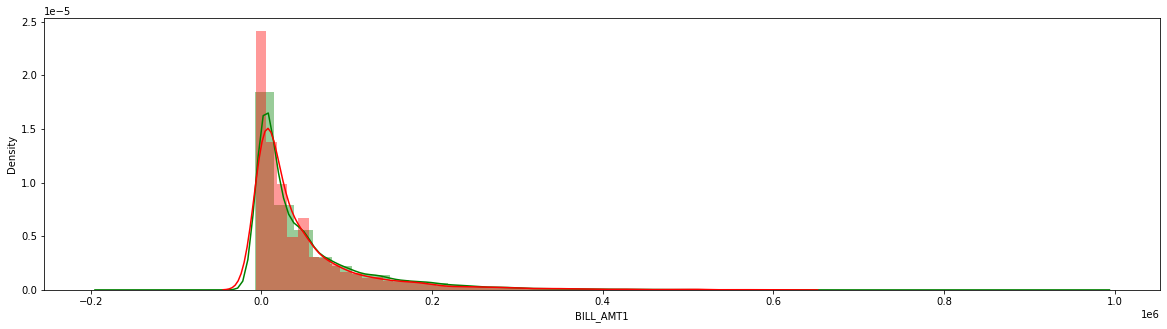

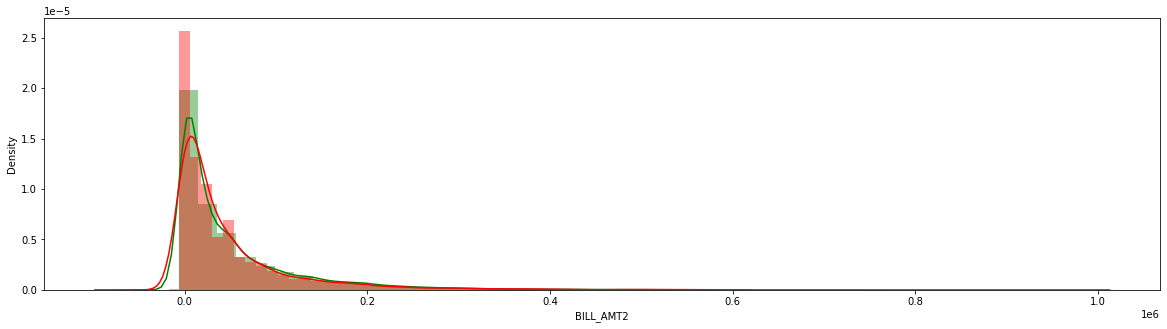

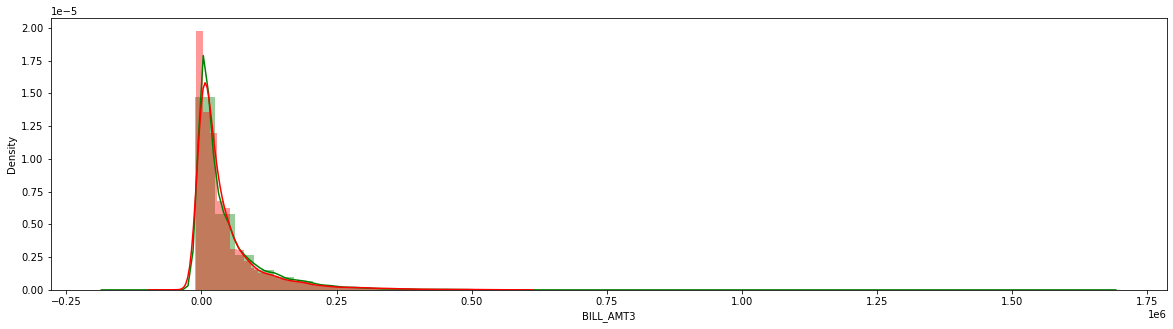

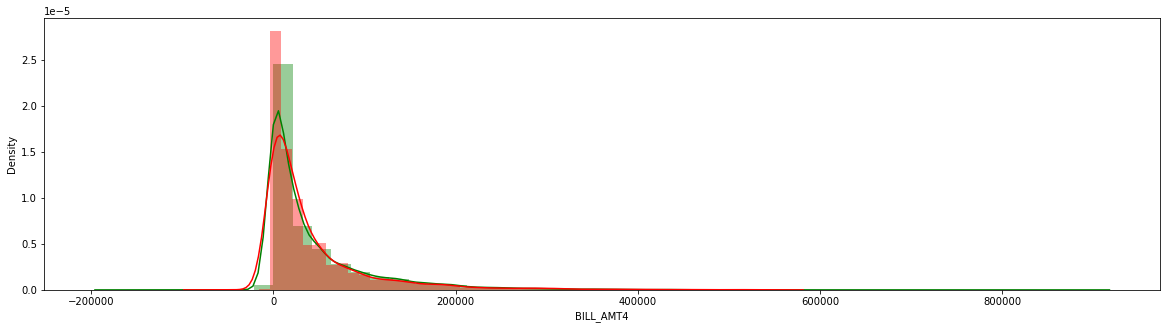

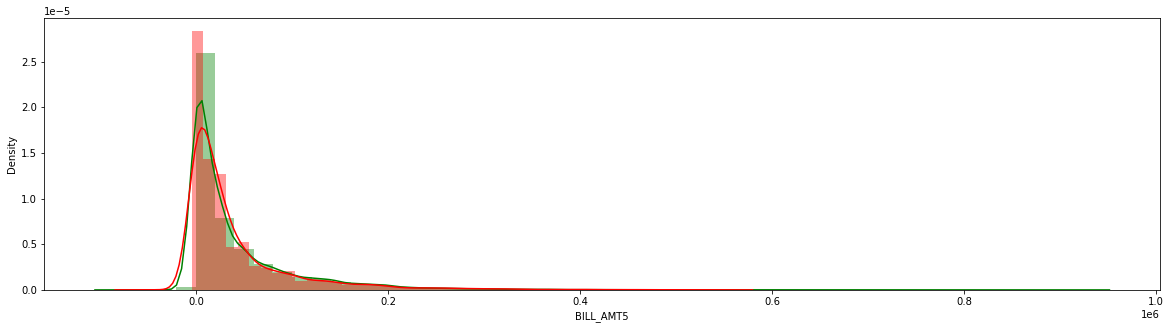

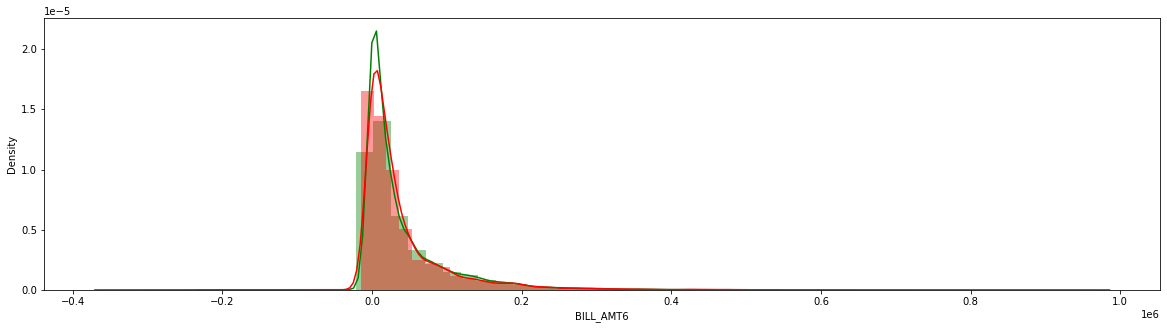

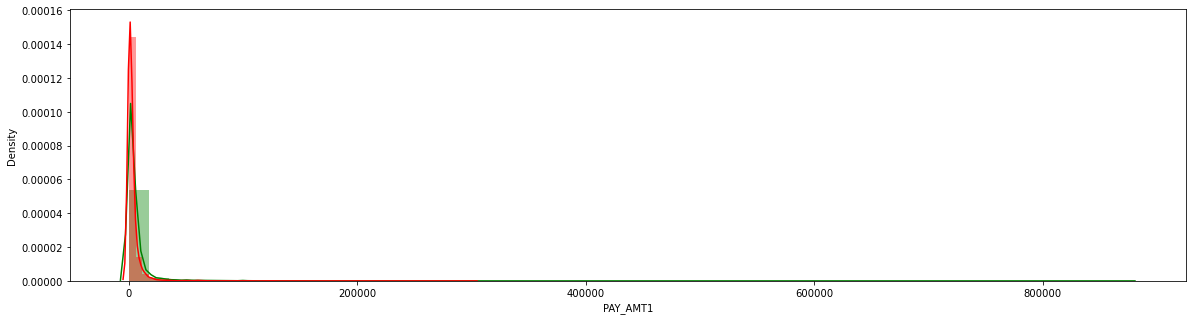

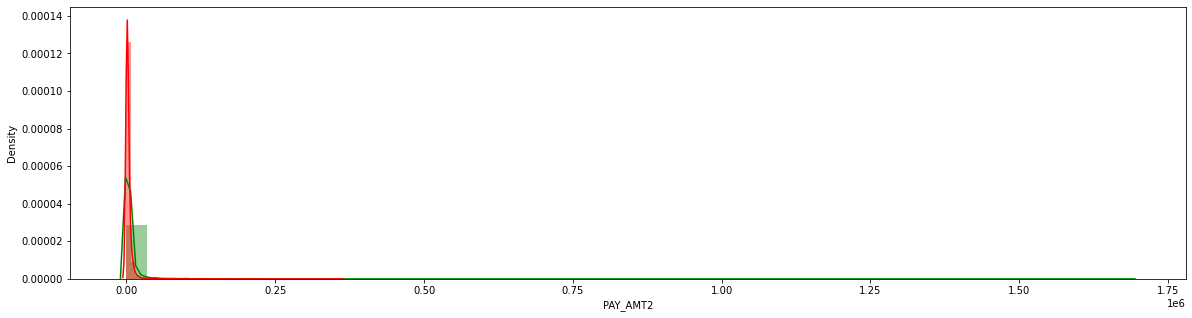

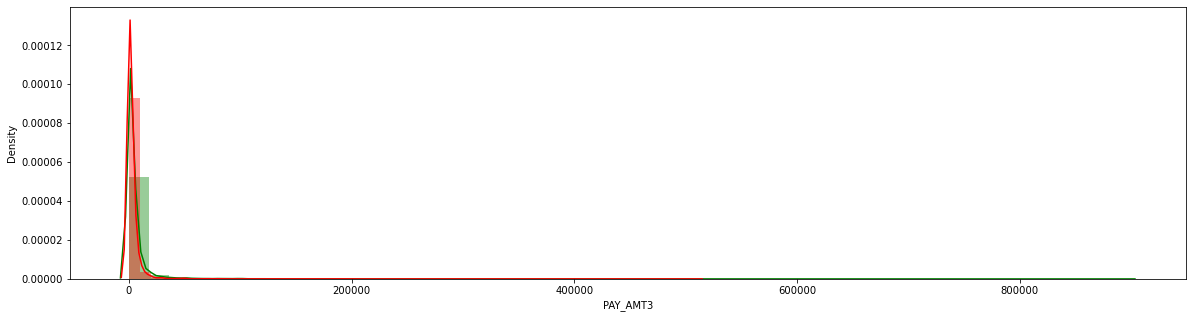

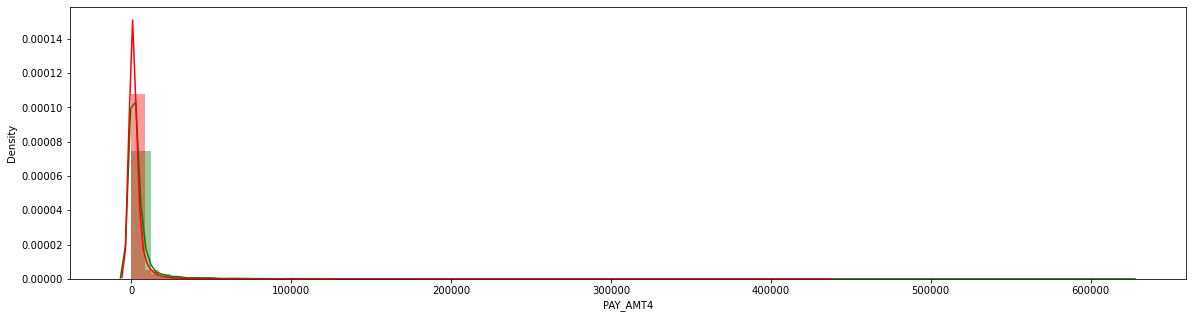

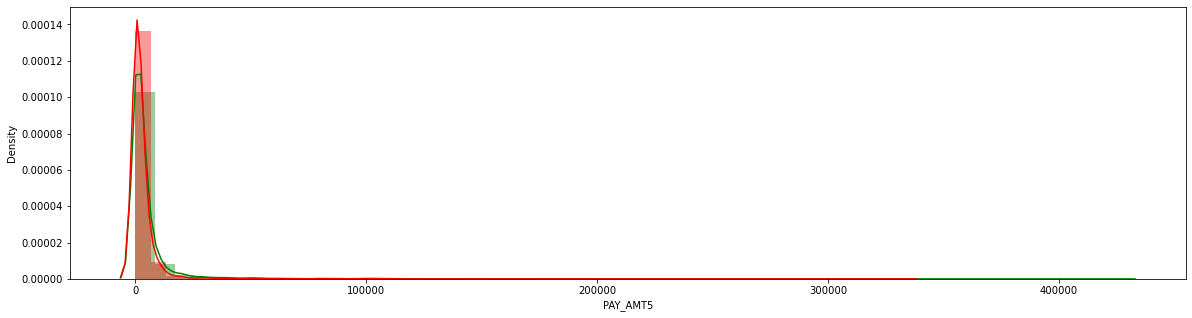

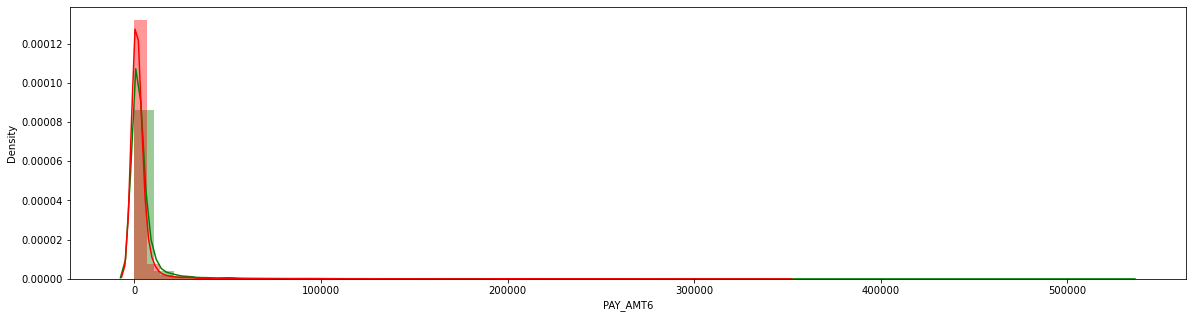

In [13]:
con_col=['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(mi0[i],color='g')
    sns.distplot(mi1[i],color='r')
    plt.show()

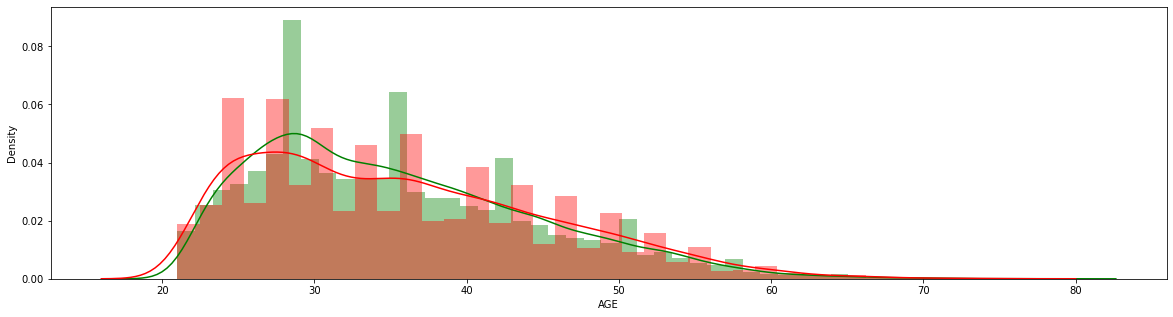

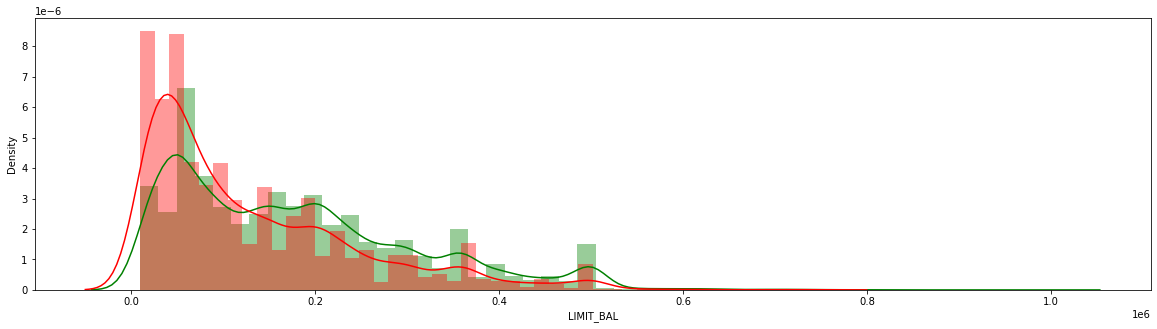

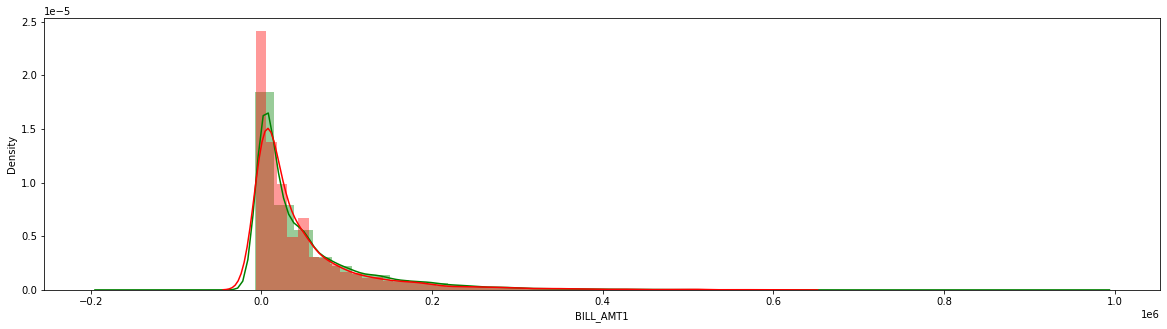

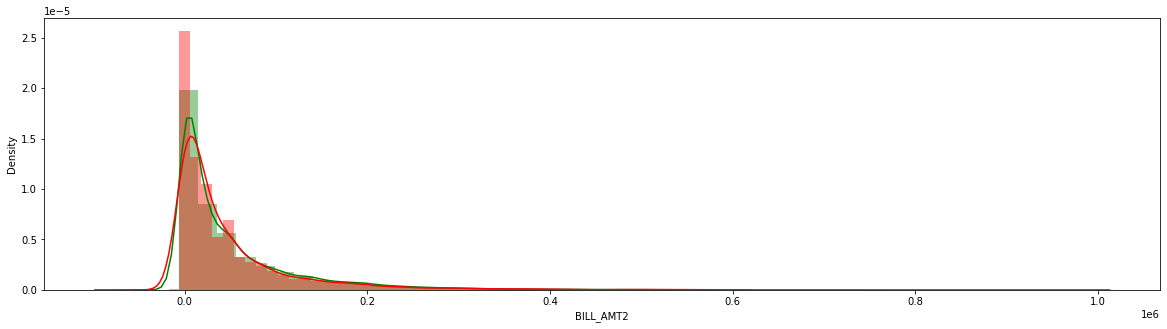

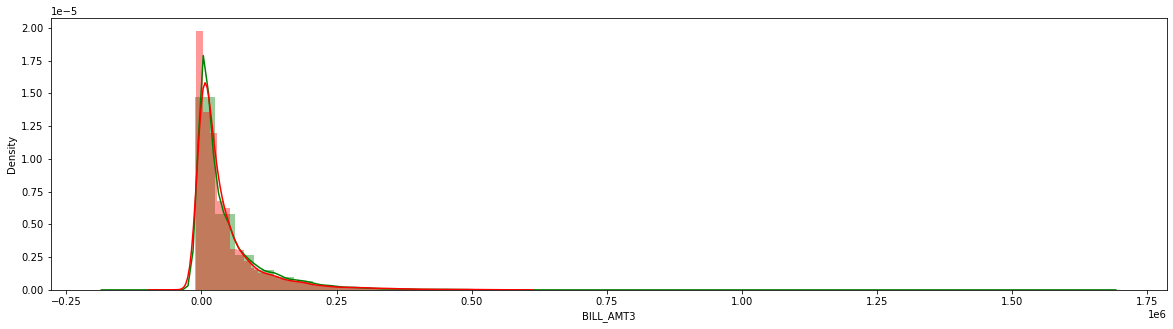

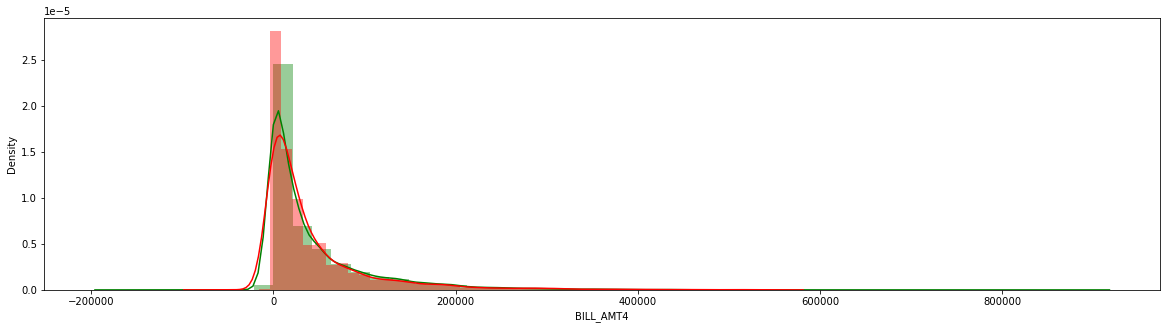

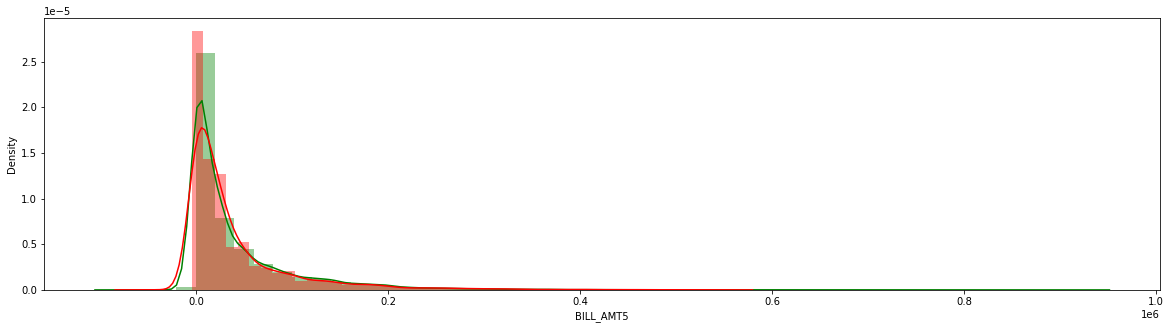

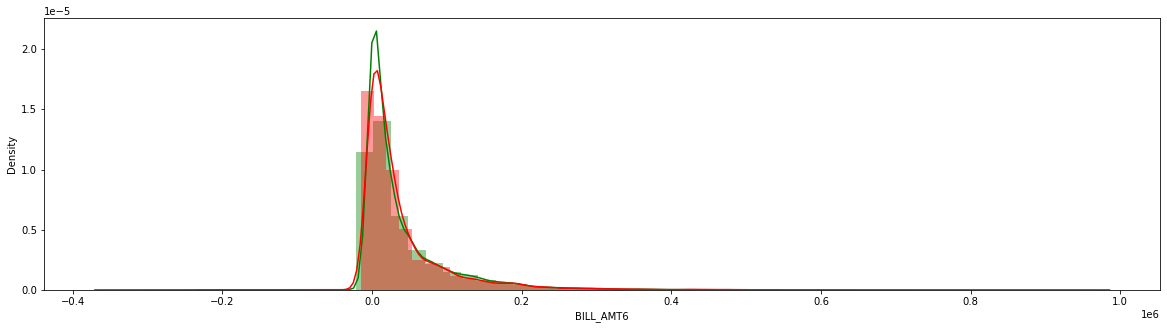

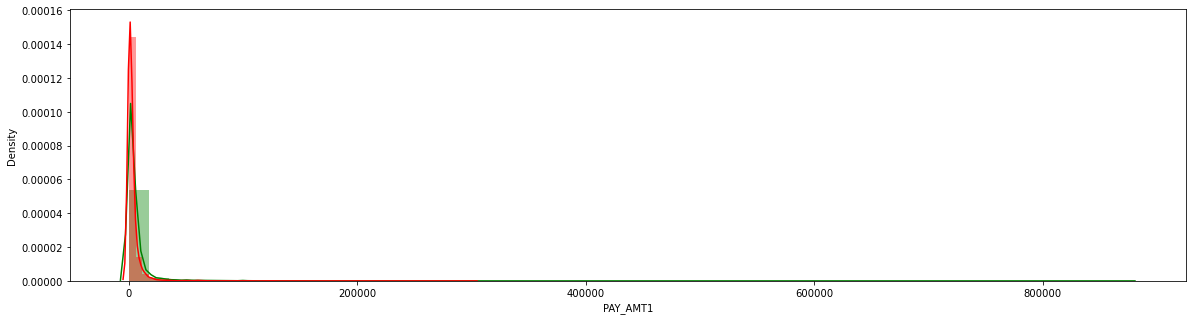

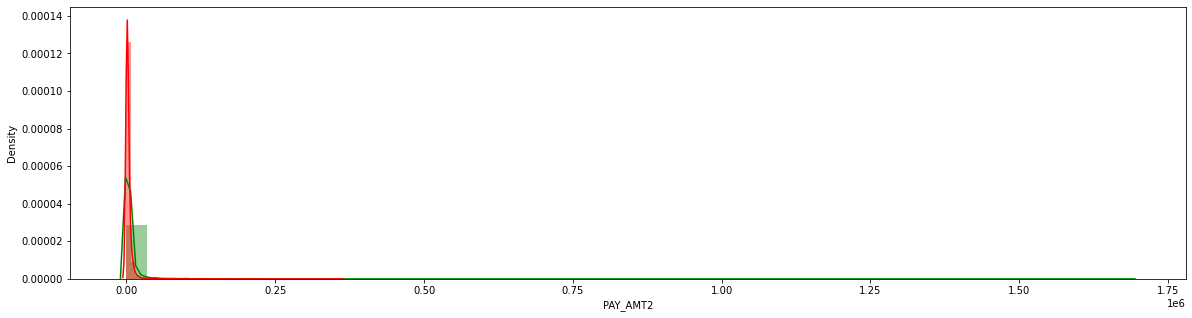

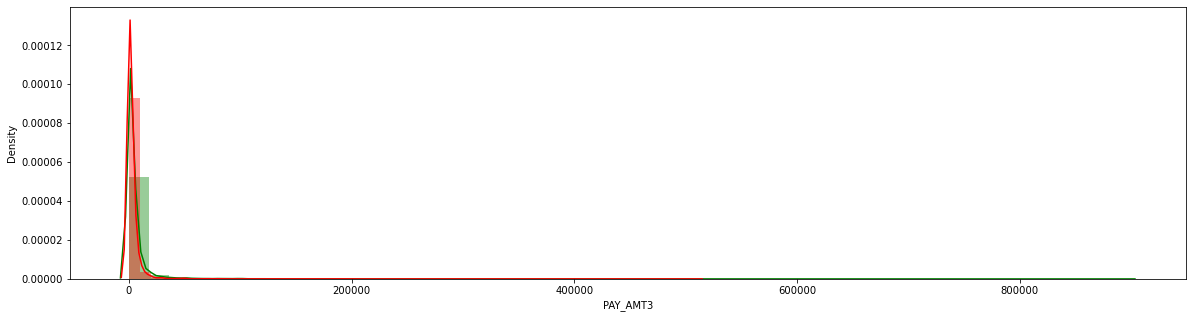

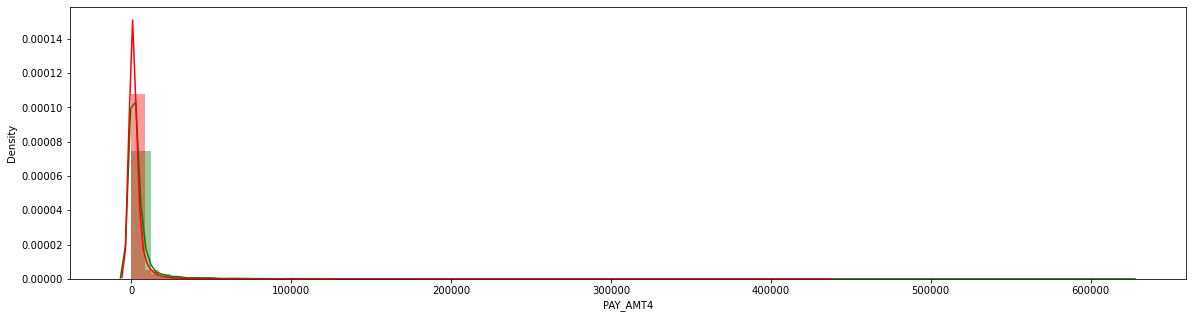

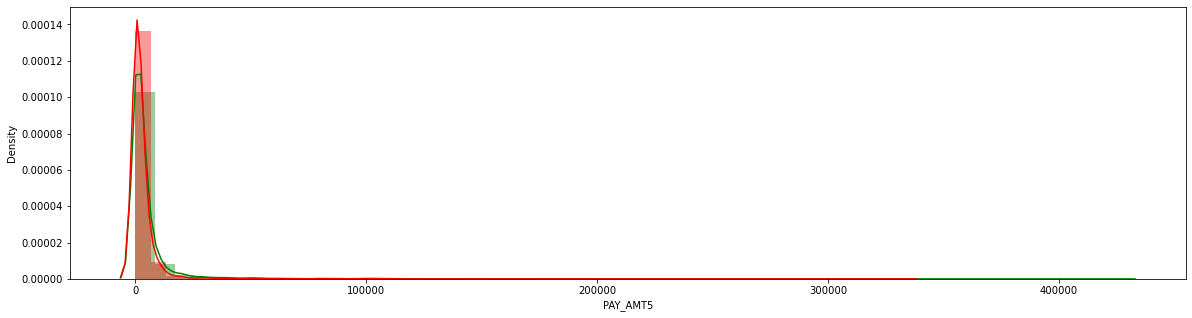

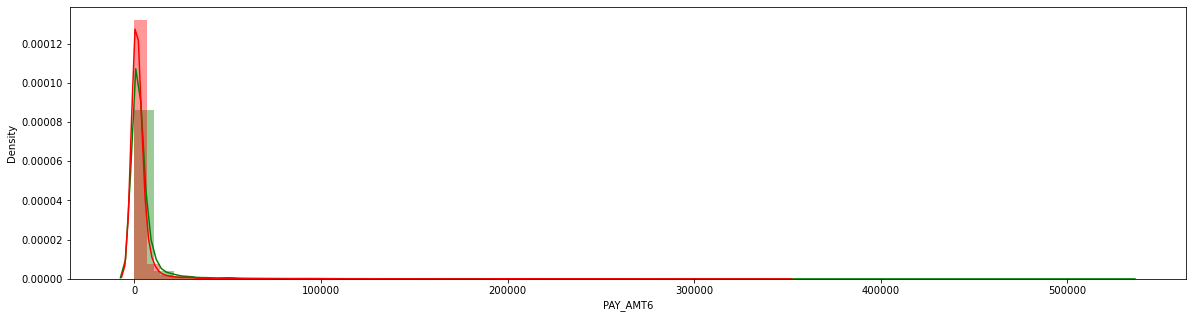

In [14]:
con_col=['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(mi0[i],color='g')
    sns.distplot(mi1[i],color='r')
    plt.show()

## Heat Map

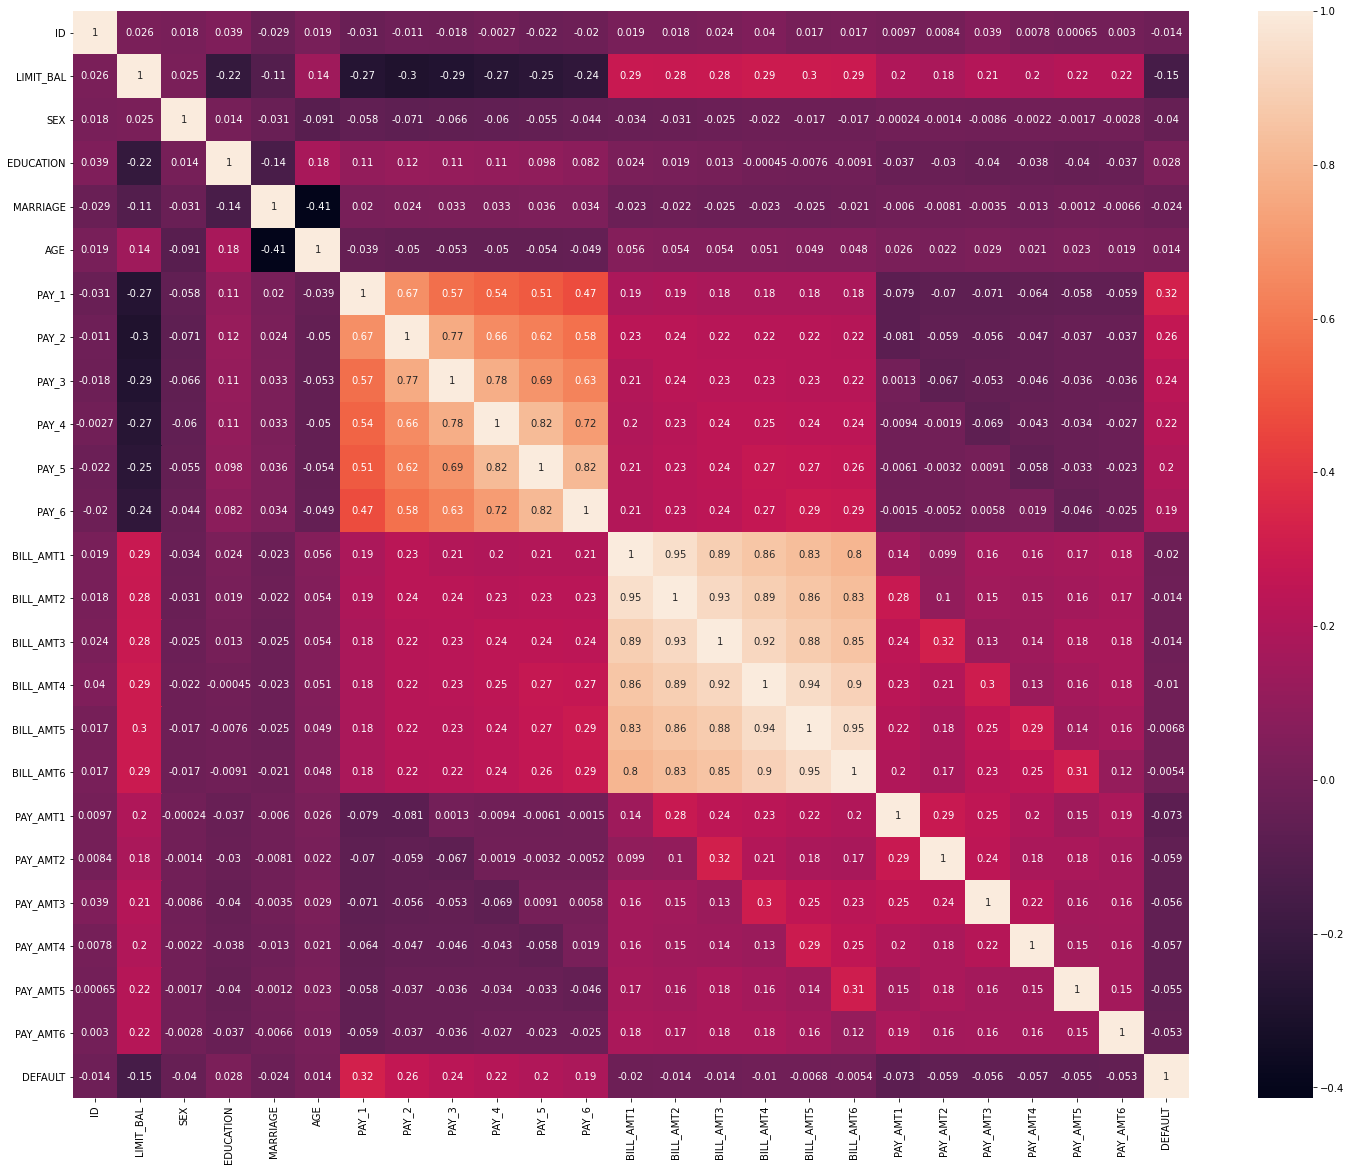

In [15]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

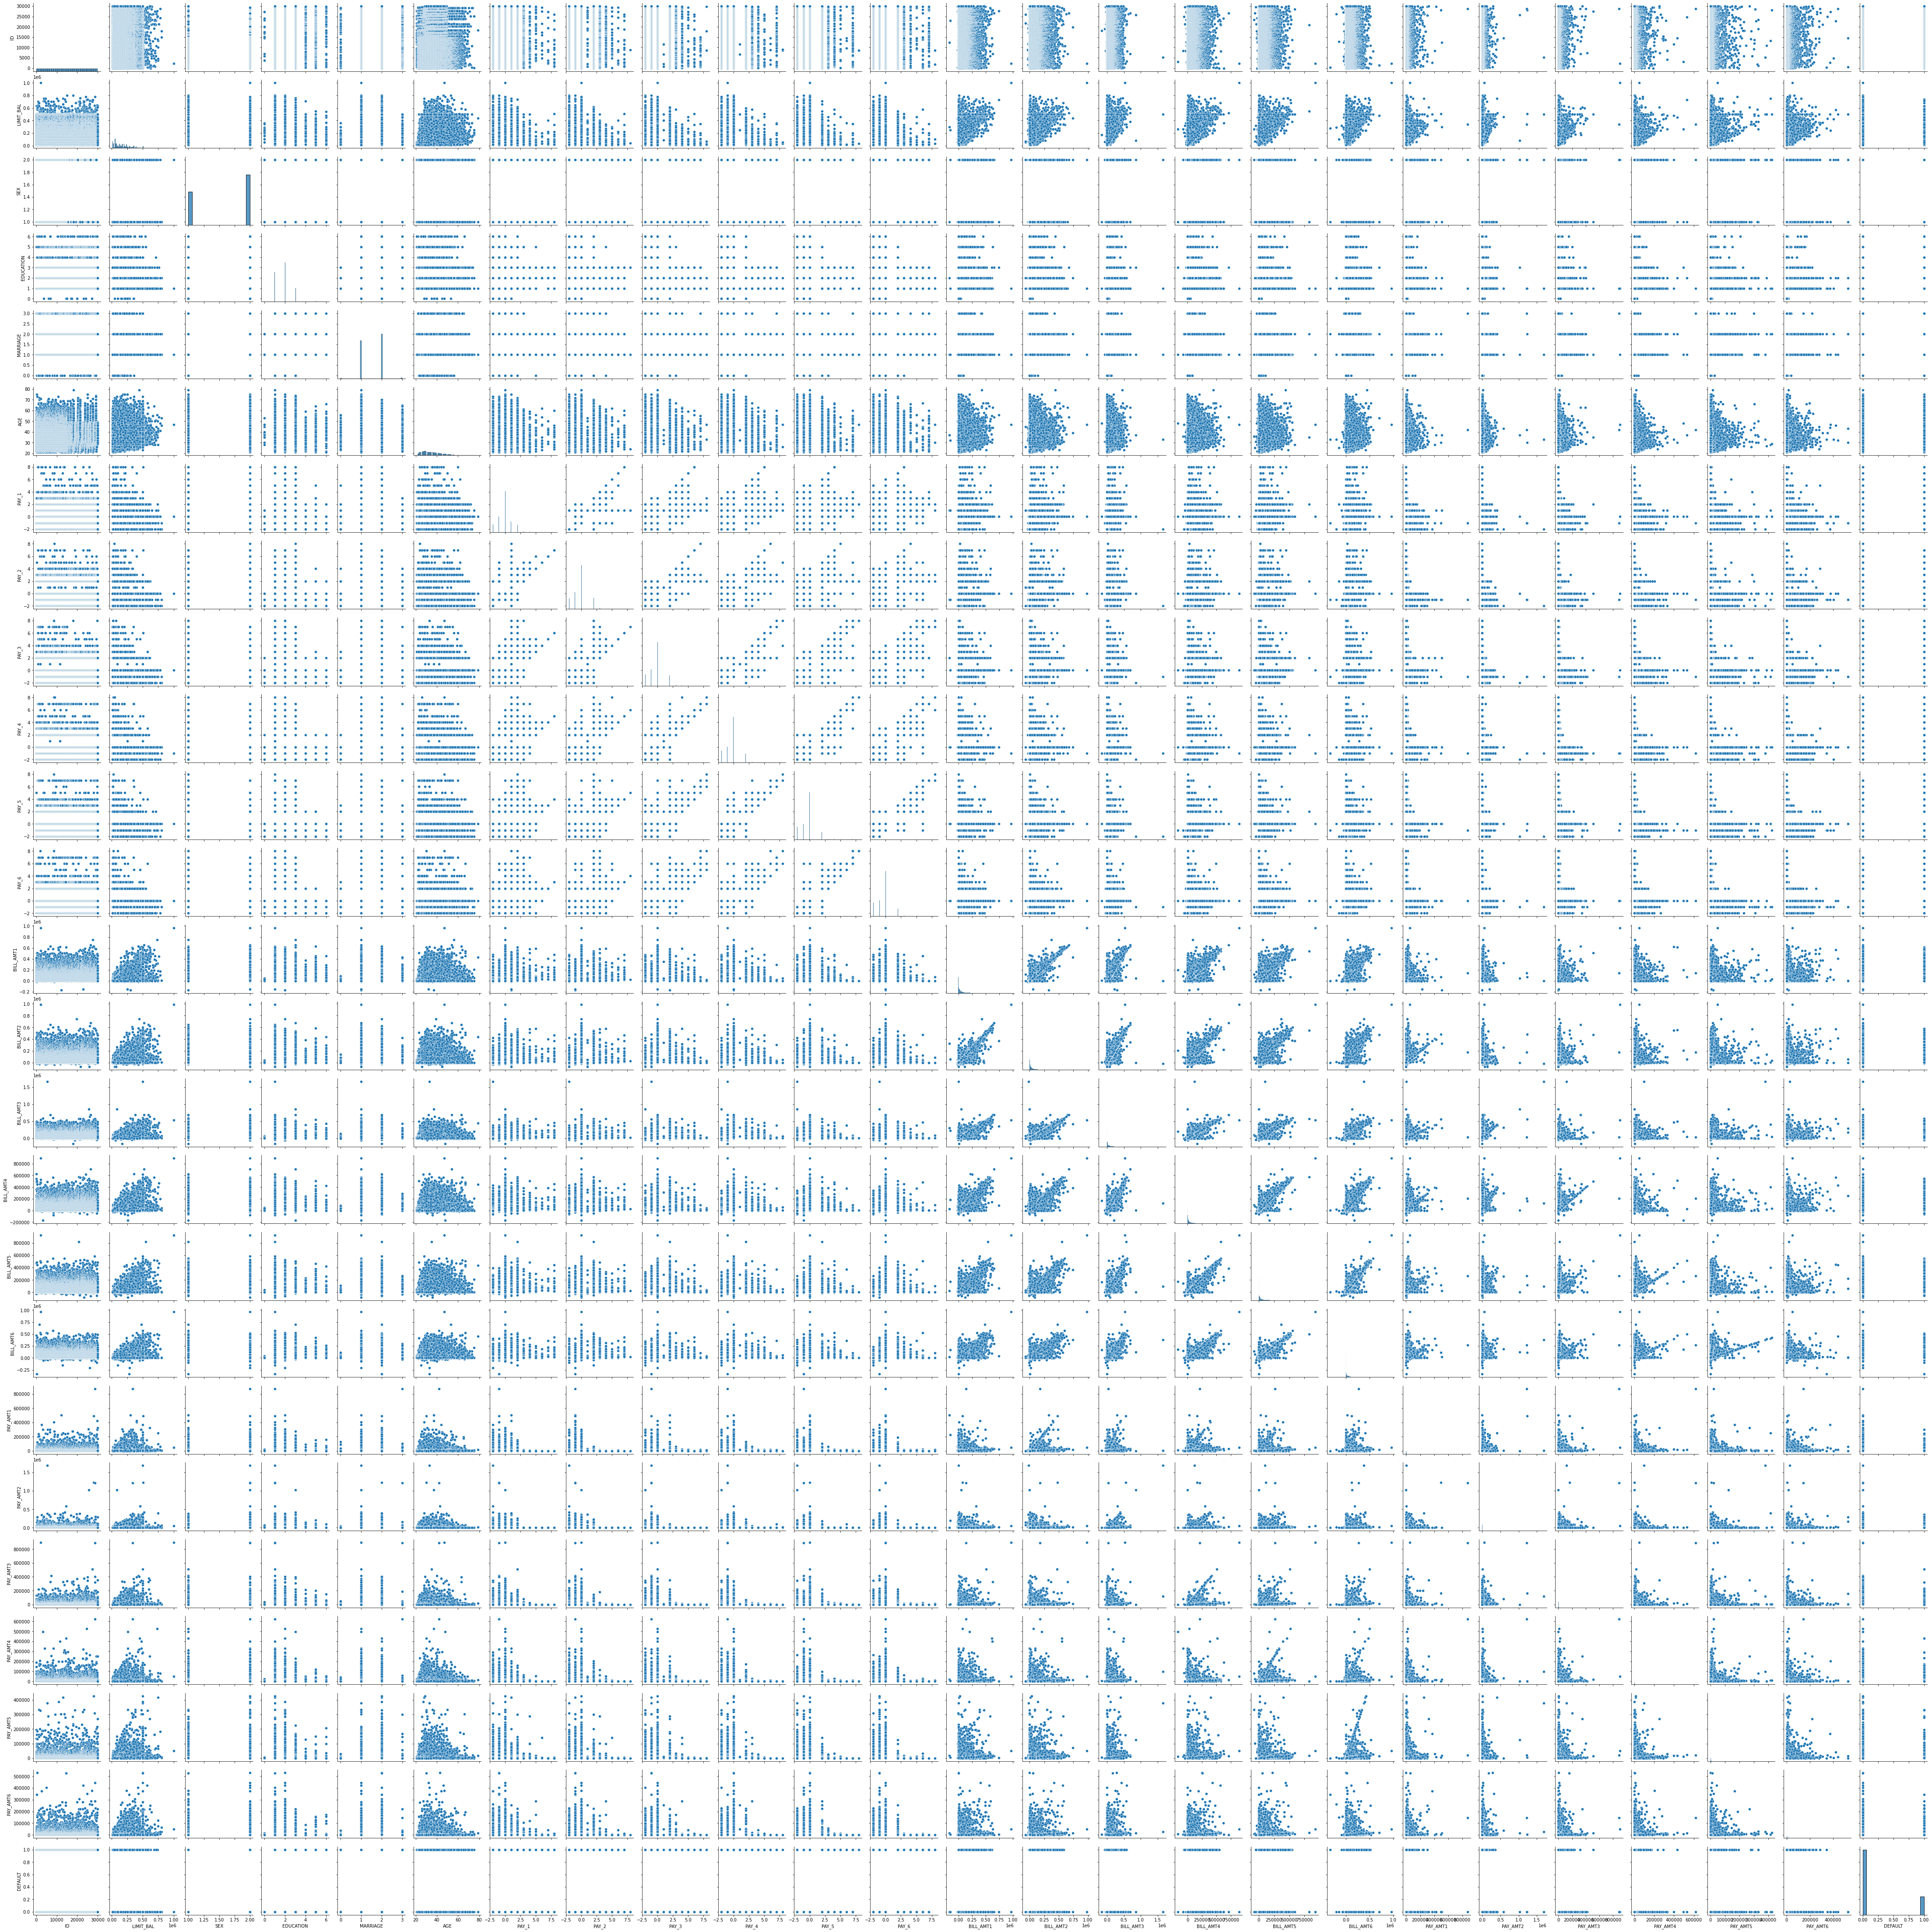

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
#Binning the 'AGE' column
def age(x):
    if x in range(21,41):
        return 1
    elif x in range(41,61):
        return 2
    elif x in range(61,80):
        return 3

df['AGE']=df['AGE'].apply(age)

In [18]:
#Binning the 'PAY' column
def pay(y):
    if y == 2:
        return "Paid Duly"
    if y == 0:
        return 'Paid Duly'
    if y == -1:
        return 'Paid Duly'
    if y in range(1,4):
        return '1 to 3'
    if y in range(4,7):
        return '4 to 6'
    if y in range(7,9):
        return '7 to 9'

for i in df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    df[i]=df[i].apply(pay)

In [19]:
# Replacing 0,5,6 to 4 in education columns
def rep(x):
    if x in [0,4,5,6]:
        return 4
    else:
        return x
df['EDUCATION']=df.EDUCATION.apply(rep)

In [20]:
# Dataset after feature engineering

df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE      PAY_1      PAY_2  \
0   1      20000    2          2         1    1  Paid Duly  Paid Duly   
1   2     120000    2          2         2    1  Paid Duly  Paid Duly   
2   3      90000    2          2         2    1  Paid Duly  Paid Duly   
3   4      50000    2          2         1    1  Paid Duly  Paid Duly   
4   5      50000    1          2         1    2  Paid Duly  Paid Duly   

       PAY_3      PAY_4  ... BILL_AMT4 BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0  Paid Duly  Paid Duly  ...         0         0          0         0   
1  Paid Duly  Paid Duly  ...      3272      3455       3261         0   
2  Paid Duly  Paid Duly  ...     14331     14948      15549      1518   
3  Paid Duly  Paid Duly  ...     28314     28959      29547      2000   
4  Paid Duly  Paid Duly  ...     20940     19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0       689         0         0         0         0        1  
1      1000      1000      1000         0      2000        1  
2      1500      1000      1000      1000      5000        0  
3      2019      1200      1100      1069      1000        0  
4     36681     10000      9000       689       679        0  

[5 rows x 25 columns]

## Encoding categorical variable:

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=object).columns:
    df[col] = le.fit_transform(df[col])

## Splitting dataset in dependent and independent variable


In [22]:
X =df.drop('DEFAULT',axis=1)
y = df['DEFAULT']
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1    1      3      3      3      3   
1   2     120000    2          2         2    1      3      3      3      3   
2   3      90000    2          2         2    1      3      3      3      3   
3   4      50000    2          2         1    1      3      3      3      3   
4   5      50000    1          2         1    2      3      3      3      3   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

## Splitting dataset in dependent and independent variable:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Checking if Data is Imbalance:

0    77.88
1    22.12
Name: DEFAULT, dtype: float64


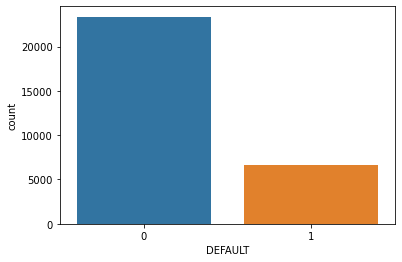

In [24]:
print((df['DEFAULT'].value_counts()/df['DEFAULT'].shape)*100)
sns.countplot(df['DEFAULT'])
plt.show()

In [25]:
#Here we can see that the data is imbalanced.

## Balancing the dataset:

In [26]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (21000, 24)
Before OverSampling, the shape of train_y: (21000,) 



In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='all')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

After OverSampling, the shape of train_X: (32728, 24)
After OverSampling, the shape of train_y: (32728,) 



# Modelling

In [29]:
#Base Model using LogisticRegression:

logreg = LogisticRegression(solver='liblinear', fit_intercept=True)

logreg.fit(X_train_sm, y_train_sm)

y_prob_train = logreg.predict_proba(X_train_sm)[:,1]
y_pred_train = logreg.predict (X_train_sm)

print('Classification report - Train: ', '\n', classification_report(y_train_sm, y_pred_train))

y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict (X_test)

print('Classification report - Test: ','\n', classification_report(y_test, y_pred))

Classification report - Train:  
               precision    recall  f1-score   support

           0       0.61      0.58      0.60     16364
           1       0.60      0.63      0.62     16364

    accuracy                           0.61     32728
   macro avg       0.61      0.61      0.61     32728
weighted avg       0.61      0.61      0.61     32728

Classification report - Test:  
               precision    recall  f1-score   support

           0       0.85      0.59      0.70      7000
           1       0.31      0.63      0.41      2000

    accuracy                           0.60      9000
   macro avg       0.58      0.61      0.56      9000
weighted avg       0.73      0.60      0.64      9000



## Feature selection- Backward Elimination:


In [30]:
Xc=sm.add_constant(X_train_sm)
model = sm.Logit ( y_train_sm , Xc ).fit ( )

Optimization terminated successfully.
         Current function value: 0.565344
         Iterations 7


In [31]:
model.summary ( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                32728
Model:                          Logit   Df Residuals:                    32703
Method:                           MLE   Df Model:                           24
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.1844
Time:                        15:42:14   Log-Likelihood:                -18503.
converged:                       True   LL-Null:                       -22685.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4287      0.149     56.511      0.000       8.136       8.721
ID          -4.98e-07   1.51e-06     -0.330      0.742   -3.46e-06    2.46e-06
LIMIT_BAL  -2.413e-06   1.26e-07    -19.140      0.000   -2.66e-06   -2.17e-06
SEX           -0.7667      0.025    -30.220      0.000      -0.816      -0.717
EDUCATION     -0.4546      0.020    -22.823      0.000      -0.494      -0.416
MARRIAGE      -1.1577      0.026    -43.853      0.000      -1.209      -1.106
AGE           -0.8153      0.032    -25.726      0.000      -0.877      -0.753
PAY_1         -0.3334      0.012    -28.602      0.000      -0.356      -0.311
PAY_2         -0.3553      0.033    -10.913      0.000      -0.419      -0.291
PAY_3         -0.0596      0.039     -1.541      0.123      -0.135       0.016
PAY_4         -0.0114      0.047     -0.242      0.809      -0.103       0.081
PAY_5         -0.1690      0.046     -3.658      0.000      -0.260      -0.078
PAY_6         -0.2048      0.040     -5.120      0.000      -0.283      -0.126
BILL_AMT1  -6.962e-06    9.9e-07     -7.029      0.000    -8.9e-06   -5.02e-06
BILL_AMT2   5.356e-06   1.32e-06      4.069      0.000    2.78e-06    7.94e-06
BILL_AMT3   1.495e-06   1.19e-06      1.251      0.211   -8.47e-07    3.84e-06
BILL_AMT4   1.319e-06   1.17e-06      1.125      0.261   -9.79e-07    3.62e-06
BILL_AMT5   -6.81e-07   1.36e-06     -0.501      0.616   -3.34e-06    1.98e-06
BILL_AMT6    3.17e-06   1.06e-06      2.990      0.003    1.09e-06    5.25e-06
PAY_AMT1   -2.388e-05      2e-06    -11.955      0.000   -2.78e-05      -2e-05
PAY_AMT2   -1.385e-05   1.75e-06     -7.900      0.000   -1.73e-05   -1.04e-05
PAY_AMT3    -8.98e-06   1.58e-06     -5.699      0.000   -1.21e-05   -5.89e-06
PAY_AMT4   -8.727e-06   1.59e-06     -5.499      0.000   -1.18e-05   -5.62e-06
PAY_AMT5   -8.815e-06   1.59e-06     -5.535      0.000   -1.19e-05   -5.69e-06
PAY_AMT6   -3.967e-06   1.16e-06     -3.422      0.001   -6.24e-06   -1.69e-06
==============================================================================
"""

In [32]:
cols = list(X_train_sm.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sm[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train_sm,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Important features: {}".format(selected_features_BE))
print("\nNumber of important features: {}".format(len(selected_features_BE)))

Important features: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Number of important features: 18


In [33]:
# Adding target column DEFAULT

selected_features_BE.append('DEFAULT')
df2=df[selected_features_BE]

### Logistic Regression with important feature

In [34]:
X = df2.drop('DEFAULT',axis=1)
y = df2['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

smote = SMOTE(sampling_strategy='all')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression(solver='liblinear', fit_intercept=True)

logreg.fit(X_train, y_train)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict (X_train)

print('Classification report - Train: ', '\n', classification_report(y_train, y_pred_train))

y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict (X_test)

print('Classification report - Test: ','\n', classification_report(y_test, y_pred))

Classification report - Train:  
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     16364
           1       0.33      0.00      0.00      4636

    accuracy                           0.78     21000
   macro avg       0.56      0.50      0.44     21000
weighted avg       0.68      0.78      0.68     21000

Classification report - Test:  
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      7000
           1       0.50      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.64      0.50      0.44      9000
weighted avg       0.72      0.78      0.68      9000



 ## Decision Tree 

In [35]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X_train_sm, y_train_sm)

y_pred_train = dt.predict(X_train_sm)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [36]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      7000
           1       0.28      0.38      0.32      2000

    accuracy                           0.64      9000
   macro avg       0.54      0.55      0.54      9000
weighted avg       0.69      0.64      0.66      9000



# Hyperparameter Tuning

In [37]:
dt = DecisionTreeClassifier(random_state=1)

params = {'criterion': ['gini','entropy'],
          'splitter' : ["best", "random"],
          'max_depth' : [2,4,6,8,10,12],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2,3,4,5]}

rand_search_dt = RandomizedSearchCV(dt, param_distributions=params, cv=3)

rand_search_dt.fit(X_train_sm,y_train_sm)

rand_search_dt.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 12,
 'criterion': 'gini'}

In [38]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**rand_search_dt.best_params_, random_state=1)

dt.fit(X_train_sm, y_train_sm)

y_pred = dt.predict(X_test)

In [39]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7000
           1       0.32      0.38      0.34      2000

    accuracy                           0.68      9000
   macro avg       0.56      0.57      0.57      9000
weighted avg       0.70      0.68      0.69      9000



### Random Forest

In [40]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_sm,y_train_sm)

y_pred = rfc.predict(X_test)

In [41]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      7000
           1       0.40      0.36      0.38      2000

    accuracy                           0.74      9000
   macro avg       0.61      0.60      0.61      9000
weighted avg       0.73      0.74      0.73      9000



## Hyperparameter Tuning

In [42]:
rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,30),
          'criterion' : ['gini','entropy'],
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,20),
          'min_samples_leaf' : sp_randint(1,20),
          'max_features' : sp_randint(2,18)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params, random_state=1, cv=3)

rand_search_rfc.fit(X_train_sm,y_train_sm)

rand_search_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 19,
 'n_estimators': 28}

In [43]:
# Passing best parameter for the Hyperparameter Tuning
rfc = RandomForestClassifier(**rand_search_rfc.best_params_, random_state=1)

rfc.fit(X_train_sm, y_train_sm)

y_pred = rfc.predict(X_test)

In [44]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      7000
           1       0.36      0.41      0.39      2000

    accuracy                           0.71      9000
   macro avg       0.59      0.60      0.60      9000
weighted avg       0.72      0.71      0.72      9000



In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.7096666666666667


# END